This notebook present the steps to generate merged catalog files. The reason that we need to generate such files is that:

1. Bliss needs input parameters that contains psf, fluxes, location, source type, galaxy related parameters, but the truth catalog in DC2 does not provide galaxy parameters or psf
2. To get those parameter, we need to use CosmoDC2 dataset and truth-match table, where the galaxy parameters and psf are stored.
3. To save the time for multiple merging when loading the data, we store the merged dataset into corresponding merged_catalog_{}.pkl files

### Load Catalog

Use [GCRCatalogs](https://data.lsstdesc.org/doc/install_gcr) package to load the dc2 truth catalog and CosomoDC2.




In [4]:
import pickle

In [1]:
import GCRCatalogs
GCRCatalogs.set_root_dir("/nfs/turbo/lsa-regier/lsstdesc-public/dc2")
truth_cat = GCRCatalogs.load_catalog('desc_dc2_run2.2i_dr6_truth') 
data = truth_cat.get_quantities([
    "id", "match_objectId", "cosmodc2_id", "ra", "dec", "truth_type", 
    "flux_g", "flux_i", "flux_r", "flux_u", "flux_y", "flux_z"
])

In [ ]:
# with open("truth_catalog.pkl", "rb") as inputp: 
#     data = pickle.load(inputp)

In [5]:
with open("truth_catalog.pkl", "wb") as outp:  # Overwrites any existing file.
    pickle.dump(data, outp, pickle.HIGHEST_PROTOCOL)

(array([3.175377e+06, 1.132889e+06, 5.899460e+05, 3.596190e+05,
        2.381400e+05, 1.828870e+05, 1.343980e+05, 1.002880e+05,
        8.036700e+04, 6.964100e+04, 6.158800e+04, 5.298700e+04,
        4.649800e+04, 4.028000e+04, 3.553400e+04, 3.230400e+04,
        2.993200e+04, 2.708800e+04, 2.480700e+04, 2.285300e+04,
        2.125400e+04, 1.940200e+04, 1.818500e+04, 1.666500e+04,
        1.565800e+04, 1.442600e+04, 1.351000e+04, 1.272700e+04,
        1.207000e+04, 1.127800e+04, 1.054500e+04, 1.018200e+04,
        9.575000e+03, 9.251000e+03, 8.921000e+03, 8.425000e+03,
        7.872000e+03, 7.439000e+03, 7.145000e+03, 6.899000e+03,
        6.521000e+03, 6.382000e+03, 5.963000e+03, 5.804000e+03,
        5.551000e+03, 5.158000e+03, 5.053000e+03, 4.933000e+03,
        4.578000e+03, 4.533000e+03, 4.317000e+03, 4.112000e+03,
        4.096000e+03, 3.888000e+03, 3.724000e+03, 3.515000e+03,
        3.467000e+03, 3.278000e+03, 3.084000e+03, 3.104000e+03,
        2.929000e+03, 2.899000e+03, 2.79

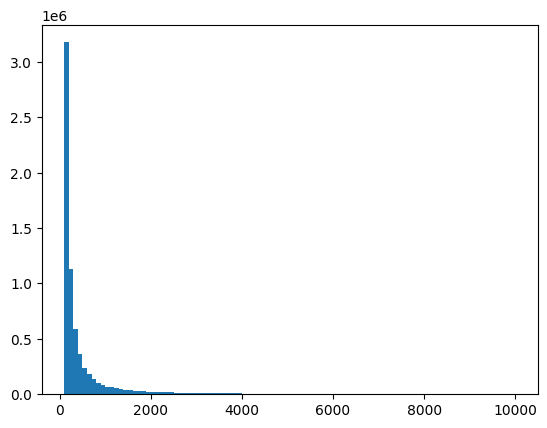

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(data["flux_r"], np.linspace(100, 10000, num=100))

In [3]:
config_overwrite = dict(
    catalog_root_dir='/nfs/turbo/lsa-regier/lsstdesc-public/dc2/cosmoDC2'
)
# take long time to load (around 10 mins for 59 files)
galaxy_cat = GCRCatalogs.load_catalog('desc_cosmodc2', config_overwrite)
galaxy = galaxy_cat.get_quantities([
    "galaxy_id", "position_angle_true", "size_minor_disk_true", 
    "size_disk_true", "size_minor_bulge_true", 
    "size_bulge_true", "bulge_to_total_ratio_i"
])

In [ ]:
# with open("galaxy_catalog.pkl", "rb") as inputp: 
#     galaxy = pickle.load(inputp)

In [6]:
with open("galaxy_catalog.pkl", "wb") as outp:  # Overwrites any existing file.
    pickle.dump(galaxy, outp, pickle.HIGHEST_PROTOCOL)

In [7]:
galaxy

{'size_disk_true': array([4.85925128, 2.69879709, 2.92465794, ..., 0.08521226, 0.12658006,
        0.02880655]),
 'galaxy_id': array([4875000000, 4875000001, 4875000002, ..., 8833313730, 8833313731,
        8833313732]),
 'size_minor_disk_true': array([3.7313538 , 1.9438807 , 1.9659876 , ..., 0.07458806, 0.09246379,
        0.027417  ], dtype=float32),
 'position_angle_true': array([ -13.96177   , -132.93484   , -139.4315    , ...,   -0.59160334,
        -106.06896   ,  -61.614918  ], dtype=float32),
 'bulge_to_total_ratio_i': array([0.        , 0.19726579, 0.        , ..., 0.        , 0.9996779 ,
        0.87273836], dtype=float32),
 'size_minor_bulge_true': array([2.193533  , 1.4420476 , 1.4618797 , ..., 0.0412369 , 0.05520297,
        0.01542215], dtype=float32),
 'size_bulge_true': array([2.25638078, 1.46839025, 1.47312816, ..., 0.04164793, 0.06016316,
        0.01544732])}

In [8]:
import GCRCatalogs
match_cat = GCRCatalogs.load_catalog('desc_dc2_run2.2i_dr6_object_with_truth_match')
psf_params = match_cat.get_quantities([
    "objectId", "IxxPSF_pixel_g", "IxxPSF_pixel_z", 
    "IxxPSF_pixel_r", "IxxPSF_pixel_i", "IxxPSF_pixel_u", 
    "IxxPSF_pixel_y", "IyyPSF_pixel_g", "IyyPSF_pixel_z", 
    "IyyPSF_pixel_r", "IyyPSF_pixel_i", "IyyPSF_pixel_u", 
    "IyyPSF_pixel_y", "IxyPSF_pixel_g", "IxyPSF_pixel_z", 
    "IxyPSF_pixel_r", "IxyPSF_pixel_i", "IxyPSF_pixel_u", 
    "IxyPSF_pixel_y", "psf_fwhm_g", "psf_fwhm_z", "psf_fwhm_r",
    "psf_fwhm_i", "psf_fwhm_u", "psf_fwhm_y"
])

In [ ]:
# with open("match_catalog.pkl", "rb") as inputp: 
#     psf_params = pickle.load(inputp)

In [9]:
with open("psf_catalog.pkl", "wb") as outp:  # Overwrites any existing file.
    pickle.dump(psf_params, outp, pickle.HIGHEST_PROTOCOL)

In [10]:
psf_params

{'objectId': array([15982501021353368, 15982501021353393, 15982501021353397, ...,
        17711783703784924, 17711783703784925, 17711783703784926]),
 'psf_fwhm_y': array([1.18745327, 1.18189992, 1.18361326, ..., 1.17228399, 1.18068899,
        1.18480986]),
 'IxyPSF_pixel_y': array([-0.00098774, -0.00331132, -0.00090126, ...,  0.01116652,
         0.0050286 ,  0.00807303]),
 'IxyPSF_pixel_u': array([ 0.00633279, -0.00346212, -0.00858512, ..., -0.06341346,
        -0.07466684, -0.06341346]),
 'IxxPSF_pixel_i': array([3.04258083, 3.04619726, 3.03737801, ..., 2.98516432, 2.99806998,
        2.99806784]),
 'IyyPSF_pixel_u': array([3.66753625, 3.59678558, 3.6212905 , ..., 3.56181499, 3.71226116,
        3.56181499]),
 'IxyPSF_pixel_i': array([ 0.00109012,  0.00133839,  0.00078231, ..., -0.00015337,
         0.00023225,  0.00024658]),
 'IyyPSF_pixel_g': array([3.09058663, 3.21323694, 3.06717577, ..., 3.50173742, 3.39988389,
        3.47086688]),
 'IxyPSF_pixel_z': array([ 0.00185848,  0.0012

### Merge Catalog 

In [11]:
import pandas as pd
df_data = pd.DataFrame(data)
df_galaxy = pd.DataFrame(galaxy)
df_psf = pd.DataFrame(psf_params)
merge_data = df_data.merge(
    df_galaxy, 
    left_on = "cosmodc2_id", 
    right_on = "galaxy_id", 
    how = "left" 
)
merge_data_fill = merge_data.fillna(-1)
data_psf = merge_data_fill.merge(
    df_psf, 
    left_on = "match_objectId", 
    right_on = "objectId", 
    how = "left" 
)

In [ ]:
# with open("merged_data.pkl", "rb") as inputp: 
#     data_psf = pickle.load(inputp)

In [12]:
with open("merged_data.pkl", "wb") as outp:  # Overwrites any existing file.
    pickle.dump(data_psf, outp, pickle.HIGHEST_PROTOCOL)

In [22]:
# filter the object by flux
flux_min = 100
bright_merge = data_psf[data_psf['flux_r'] > flux_min]

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         187., 1776., 1518., 1305., 1130.,  999.,  883.,  821.,  753.,
         702.,  622.,  548.,  493.,  509.,  454.,  426.,  413.,  352.,
         340.,  331.,  277.,  321.,  291.,  286.,  251.,  256.,  233.,
         204.,  220.,  187.,  215.,  180.,  192.,  186.,  155.,  164.,
         173.,  147.,  162.,  152.,  127.,  134.,  122.,  149.,  127.,
         126.,  113.,  112.,  108.,  128.,   99.,   96.,   86.,   88.,
          87.,   98.,   84.,   82.,   69.,   85.,   85.,   69.,   70.,
          88.,   67.,   67.,   81.,   89.,   78.,   75.,   60.,   74.,
          64.,   55.,   60.,   64.,   72.,   56.,   54.,   55.,   50.,
          59.,   60.,   55.,   64.,   68.,   47.,   51.,   58.,   64.]),
 array([1.000e+02, 1.020e+04, 2.030e+04, 3.040e+04, 4.050e+04, 5.060e+04,
        6.070e+04, 7.080e+04, 8.090e+04, 9.100e+04, 1.011e+05, 1.112e+05,
        1.213e+05, 1.314e+05, 1.415e+05, 1.516e+05, 1.617e+05, 1.718e

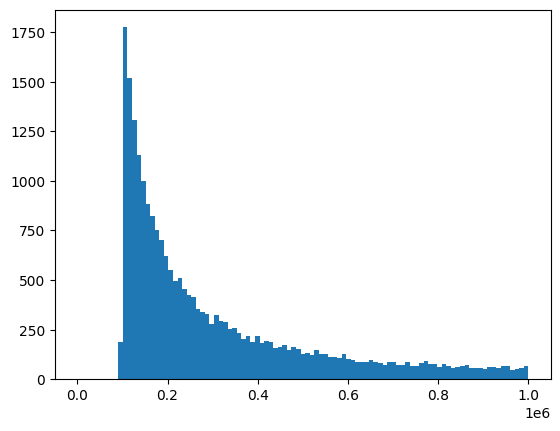

In [23]:
plt.hist(bright_merge["flux_r"], np.linspace(100, flux_min * 1000, num=100))

### Save to File

In [24]:
# create a pickle file 
bright_merge.to_pickle(f"merged_catalog_with_flux_over_{flux_min}.pkl")

: 